In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
insurance=pd.read_csv("https://github.com/sukhioo7/dataset/blob/main/insurance.csv?raw=true")

In [3]:
insurance.head()

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.isnull().sum()

age         0
gender      0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   gender    1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Text(0, 0.5, 'Frequancy')

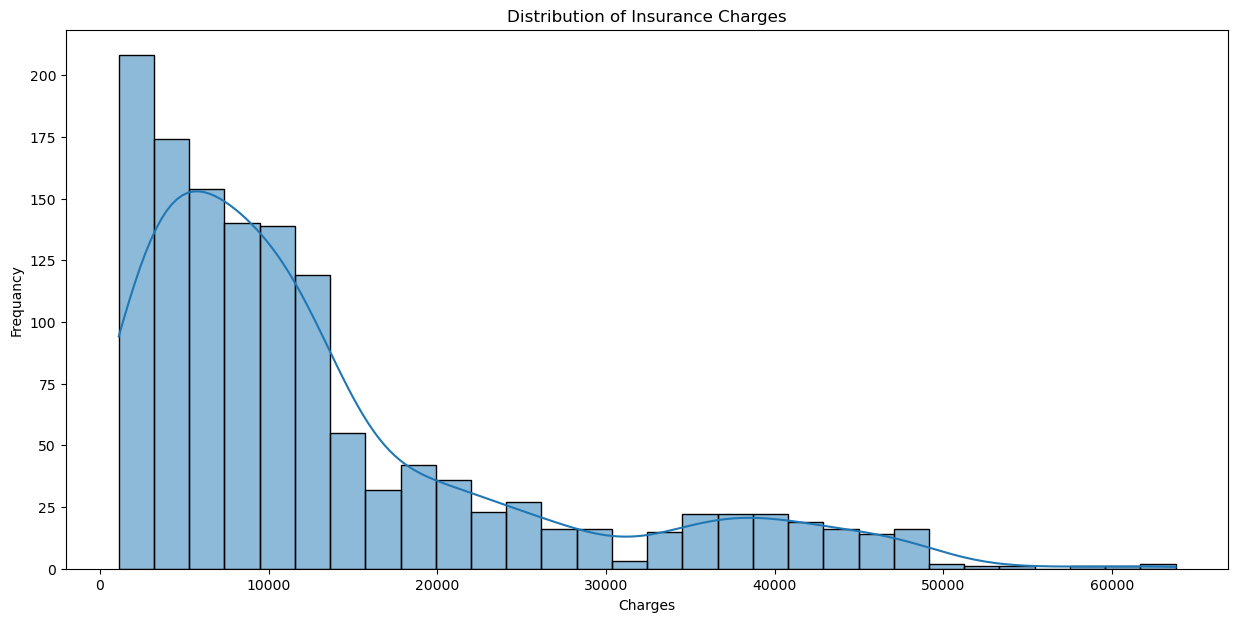

In [6]:
plt.figure(figsize=(15,7))
sns.histplot(data=insurance,x='charges',kde=True)
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequancy')

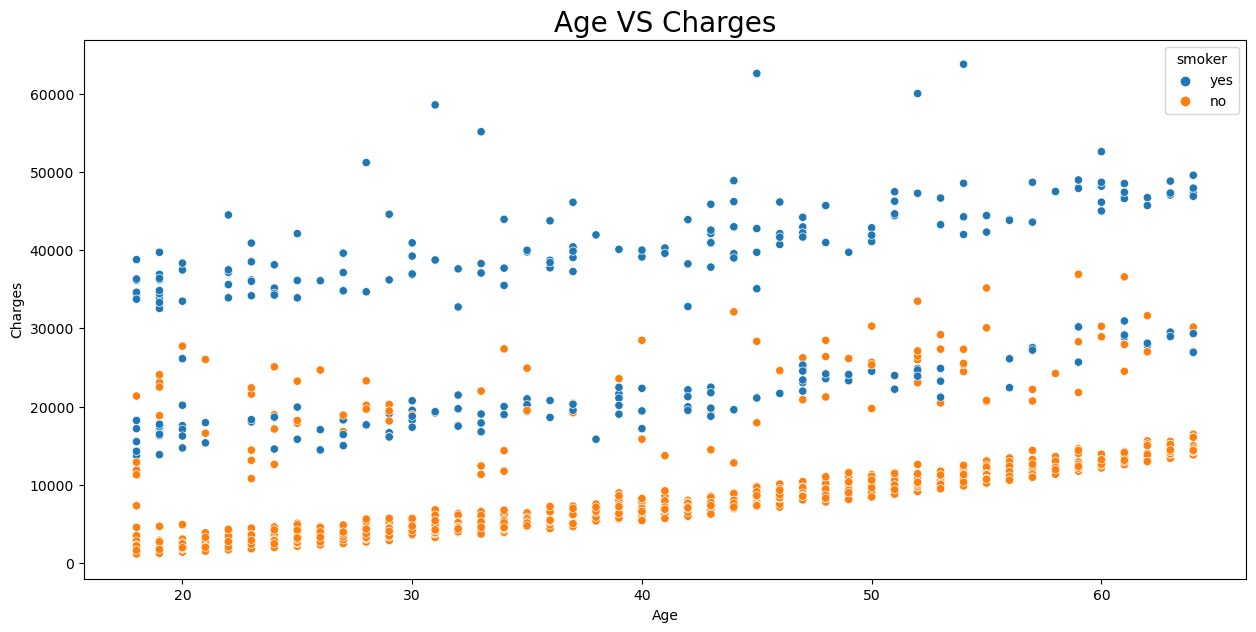

In [7]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=insurance,x="age",y="charges",hue="smoker")
plt.title('Age VS Charges',size=20)
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

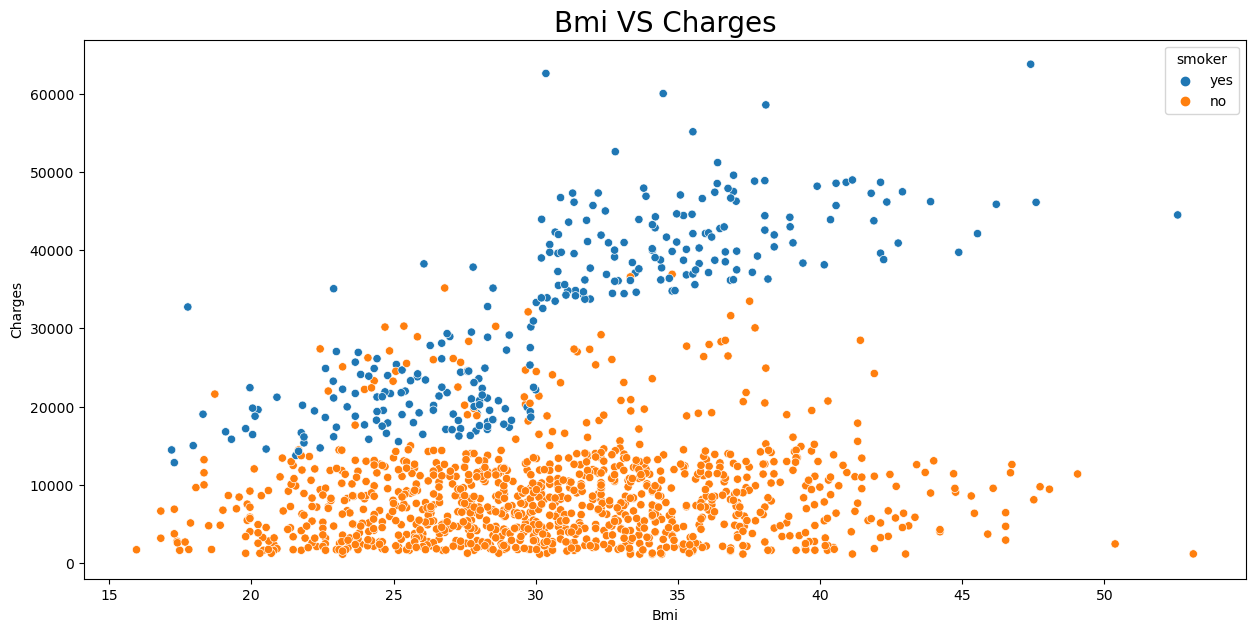

In [8]:
plt.figure(figsize=(15,7))
sns.scatterplot(data=insurance,x="bmi",y="charges",hue="smoker")
plt.title('Bmi VS Charges',size=20)
plt.xlabel('Bmi')
plt.ylabel('Charges')
plt.show()

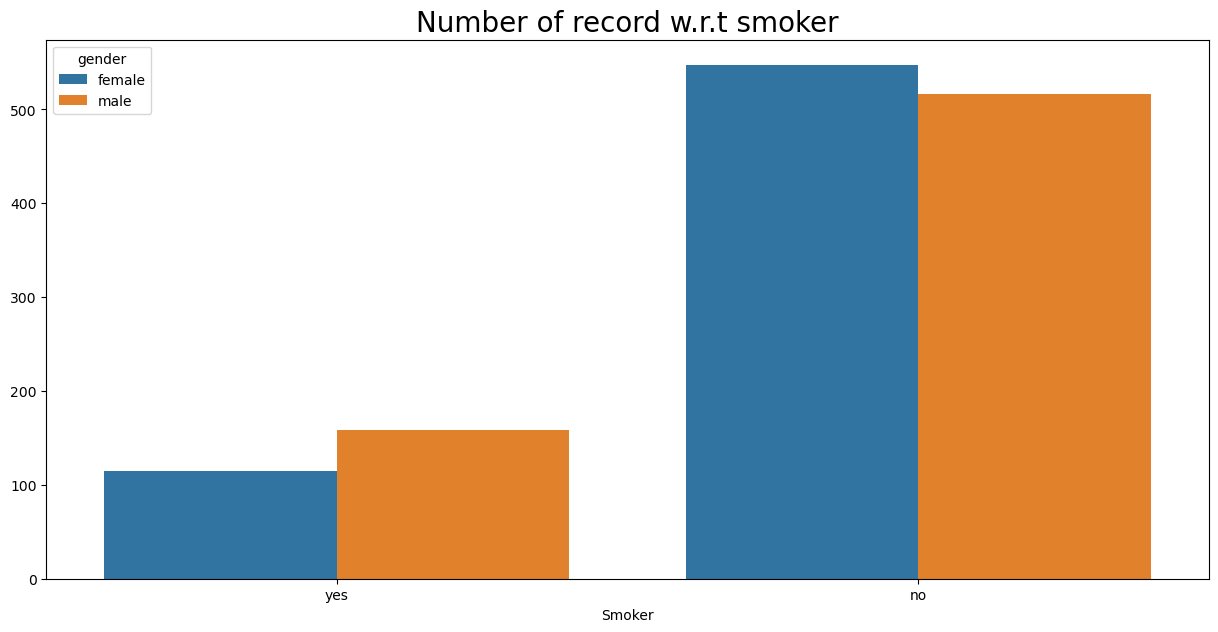

In [9]:
plt.figure(figsize=(15,7))
sns.countplot(data=insurance,x="smoker",hue="gender")
plt.title('Number of record w.r.t smoker',size=20)
plt.xlabel("Smoker")
plt.ylabel('')
plt.show()

 LABEL ENCODER

In [10]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label_encoder.fit(insurance['gender'])
insurance['gender'] = label_encoder.transform(insurance["gender"])

In [11]:
insurance.head()

,age,gender,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [12]:
label_encoder.fit(insurance['smoker'])
insurance["smoker"] = label_encoder.transform(insurance['smoker'])

In [13]:
insurance.head()

,age,gender,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


 ONE HOT ENCODER

In [14]:
from sklearn.preprocessing import OneHotEncoder
onehot_encoder=OneHotEncoder() 
onehot_encoder.fit(insurance[["region"]])
temp=onehot_encoder.transform(insurance[['region']]).toarray()

In [15]:
temp_data = pd.DataFrame(temp,columns=["northeast", "northwest", "southeast", "southwest"],dtype="int")

In [16]:
temp_data

,northeast,northwest,southeast,southwest
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
1333,0,1,0,0
1334,1,0,0,0
1335,0,0,1,0
1336,0,0,0,1


In [17]:
insurance=pd.concat([insurance,temp_data],axis=1)

In [18]:
insurance.drop("region",axis=1,inplace=True)

In [19]:
X=insurance.drop('charges',axis=1)
Y=insurance['charges']

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=101)

In [21]:
from sklearn.linear_model import LinearRegression
linear_regression=LinearRegression()

In [22]:
linear_regression.fit(X_train,Y_train)

LinearRegression()

In [23]:
predictions=linear_regression.predict(X_test)

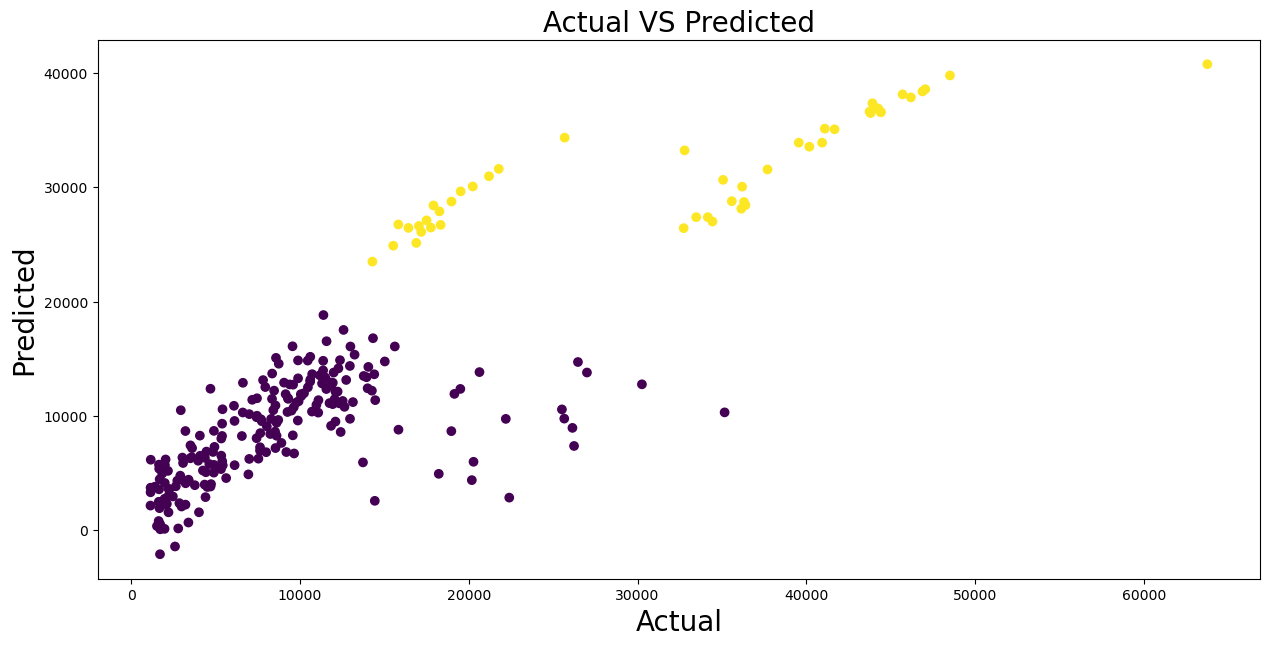

In [24]:
plt.figure(figsize=(15,7))
plt.scatter(Y_test,predictions,c=X_test['smoker'])
plt.title('Actual VS Predicted',size=20)
plt.xlabel('Actual',size=20)
plt.ylabel('Predicted',size=20)
plt.show()

In [25]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mae=mean_absolute_error(Y_test,predictions)
mse=mean_squared_error(Y_test,predictions)
rmse=np.sqrt(mse)
r2=r2_score(Y_test,predictions)

In [26]:
mae

4036.874028358431

In [27]:
mse

33748393.37059587

In [28]:
rmse

5809.336741022668

In [29]:
r2

0.7608371101323961